In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import glob
import scipy.linalg as la
import seaborn as sns

In [3]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [138]:
# Setup #
L = 8
dense = True
pert = True
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
if (pert): 
    prefix = prefix + "_pert_"
    fix    = fix    + "_pert_"
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [139]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(    int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[:,::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

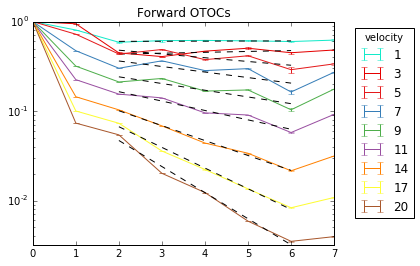

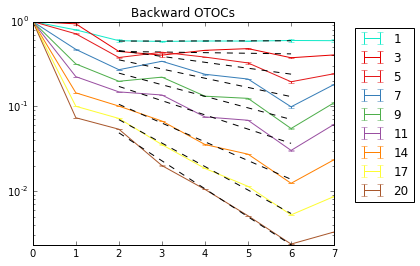

In [140]:
# Forward
ax = plt.subplot(111)
gammas_fore = []
for idx, otocfore in enumerate(otocsfore):
    mean, std = qm.mean_and_std(otocfore[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title="velocity")
plt.ylim(0,1)
plt.title("Forward OTOCs")
plt.savefig('figures/otocs_' + fix + 'foreL' + str(L) + '.pdf')
plt.show()

# Backward
ax = plt.subplot(111)
gammas_back = []
for idx, otocback in enumerate(otocsback):
    mean, std = qm.mean_and_std(otocback[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'backL' + str(L) + '.pdf')
plt.show()

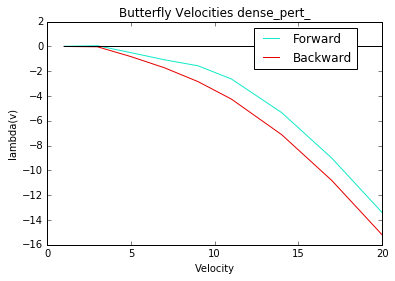

In [137]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

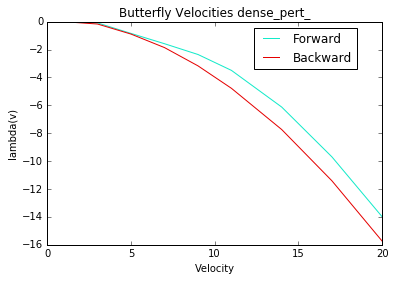

In [133]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [108]:
np.shape(otocsfore)

(9, 54, 8)

In [92]:
for idx, otocfore in enumerate(otocsfore):
    print(otocfore[:6,1:5])

[[ 0.79940917  0.52558571  0.55827032  0.55356606]
 [ 0.74083766  0.52294244  0.56087366  0.51321702]
 [ 0.78515305  0.52875104  0.52540354  0.54611347]
 [ 0.79507222  0.54746917  0.58954312  0.55973742]]
[[ 0.93327126  0.41375302  0.46006217  0.43480826]
 [ 0.88863633  0.4491666   0.44392925  0.38209836]
 [ 0.95431426  0.38203276  0.41328944  0.4041155 ]
 [ 0.91097438  0.39121146  0.42186676  0.41168797]]
[[ 0.79567888  0.40983716  0.42564737  0.34192064]
 [ 0.77821083  0.41087893  0.39846883  0.31555937]
 [ 0.80404386  0.3753986   0.37311209  0.31335104]
 [ 0.77968491  0.37620317  0.39176464  0.28004867]]
[[ 0.55006606  0.29047752  0.34917937  0.25360075]
 [ 0.54247188  0.28794814  0.32944047  0.23063792]
 [ 0.55335426  0.2651453   0.31733064  0.23303383]
 [ 0.54288456  0.27823063  0.32341867  0.21378365]]
[[ 0.37962674  0.20450799  0.23718692  0.15267984]
 [ 0.37618074  0.20236775  0.22607732  0.13924172]
 [ 0.38104838  0.19163031  0.22621121  0.13968565]
 [ 0.37635818  0.19938129  